### Unsupervisied Learning Project | PCA-SVM

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import iqr

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
df = pd.read_csv('vehicle.csv')

In [3]:
print('Shape of the given data-set are ({} x {})'.format(df.shape[0],df.shape[1]))

Shape of the given data-set are (846 x 19)


In [4]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
df.head(7)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus  
5             181.0            183   bus  
6             200.0            204   bus

### EDA

#### Check for null values

In [6]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### w.r.t the class labels, understand how many null values are there for each features


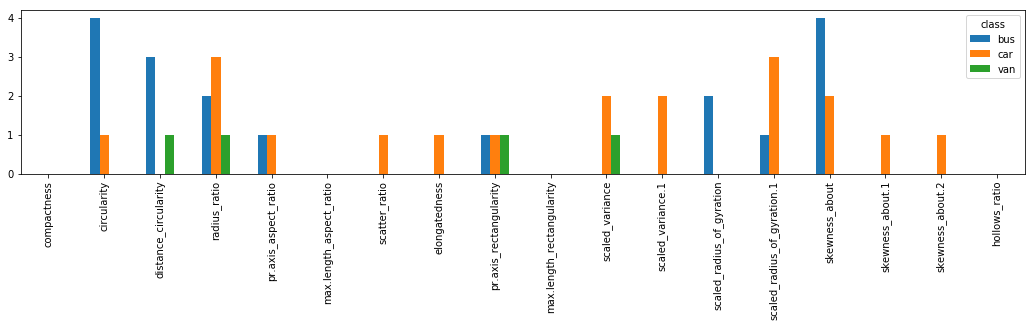

In [7]:
'''
As Groupby doesn't have isna(), calculate the total null values for each class label's features as follows 
    * class label's feature size - class labels's feature count value(excludes the nan)
''' 
df.groupby('class').count().rsub(df.groupby('class').size().values,axis=0).T.plot.bar(figsize=(18,3))
plt.show()

#### Feature's median value for each class labels

In [8]:
df.pivot_table(index='class',aggfunc='median')

circularity  compactness  distance_circularity  elongatedness  \
class                                                                  
bus           44.0           89                  72.0           44.0   
car           46.0           97                  94.0           36.0   
van           42.0           90                  75.0           47.0   

       hollows_ratio  max.length_aspect_ratio  max.length_rectangularity  \
class                                                                      
bus              189                        6                        145   
car              198                        9                        150   
van              196                        9                        145   

       pr.axis_aspect_ratio  pr.axis_rectangularity  radius_ratio  \
class                                                               
bus                    64.0                    19.0         167.5   
car                    61.0                    22.0         186.0   
van                    59.0                    18.0         144.0   

       scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
class                                                           
bus                        176.0                         76.0   
car                        182.0                         70.0   
van                        159.0                         72.0   

       scaled_variance  scaled_variance.1  scatter_ratio  skewness_about  \
class                                                                      
bus              177.0              344.0          152.0             5.0   
car              206.0              512.0          185.0             6.0   
van              164.0              300.0          142.0             6.0   

       skewness_about.1  skewness_about.2  
class                                      
bus                10.0             186.0  
car                14.0             189.0  
van                 9.0             188.0

#### Impute the null/missing value by filling it with it's(as per the class label) median value

In [9]:
df = df.groupby('class').apply(lambda grp: grp.fillna(np.mean(grp)))

df.head()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                    
bus   4            85    44.000000                  70.0         205.0   
      5           107    44.981308                 106.0         172.0   
      6            97    43.000000                  73.0         173.0   
      12           88    46.000000                  74.0         171.0   
      14           94    49.000000                  79.0         203.0   

          pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                    
bus   4                  103.0                       52          149.0   
      5                   50.0                        6          255.0   
      6                   65.0                        6          153.0   
      12                  68.0                        6          152.0   
      14                  71.0                        5          174.0   

          elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                        
bus   4            45.0                    19.0                        144   
      5            26.0                    28.0                        169   
      6            42.0                    19.0                        143   
      12           43.0                    19.0                        148   
      14           37.0                    21.0                        154   

          scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                     
bus   4             241.0              325.0                      188.0   
      5             280.0              957.0                      264.0   
      6             176.0              361.0                      172.0   
      12            180.0              349.0                      192.0   
      14            196.0              465.0                      206.0   

          scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                     
bus   4                         127.0             9.0              11.0   
      5                          85.0             5.0               9.0   
      6                          66.0            13.0               1.0   
      12                         71.0             5.0              11.0   
      14                         71.0             6.0               2.0   

          skewness_about.2  hollows_ratio class  
class                                            
bus   4              180.0            183   bus  
      5              181.0            183   bus  
      6              200.0            204   bus  
      12             189.0            195   bus  
      14             197.0            199   bus

In [10]:
'''
The above resultant df has label named 'class' as a column as well as an index. 
Hence, drop the column, reset_index are restore to orginal index in the df.

Note: 
Before dropping the column class if reset_index() is executed it fails as it seems ambigous for the library
as there was already a column named class.
'''
df = df.drop(columns='class').reset_index().set_index('level_1').sort_index()


In [11]:
df.head()

class  compactness  circularity  distance_circularity  radius_ratio  \
level_1                                                                       
0         van           95         48.0                  83.0         178.0   
1         van           91         41.0                  84.0         141.0   
2         car          104         50.0                 106.0         209.0   
3         van           93         41.0                  82.0         159.0   
4         bus           85         44.0                  70.0         205.0   

         pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
level_1                                                                 
0                        72.0                       10          162.0   
1                        57.0                        9          149.0   
2                        66.0                       10          207.0   
3                        63.0                        9          144.0   
4                       103.0                       52          149.0   

         elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
level_1                                                                     
0                 42.0                    20.0                        159   
1                 45.0                    19.0                        143   
2                 32.0                    23.0                        158   
3                 46.0                    19.0                        143   
4                 45.0                    19.0                        144   

         scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
level_1                                                                  
0                  176.0              379.0                      184.0   
1                  170.0              330.0                      158.0   
2                  223.0              635.0                      220.0   
3                  160.0              309.0                      127.0   
4                  241.0              325.0                      188.0   

         scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
level_1                                                                  
0                               70.0             6.0              16.0   
1                               72.0             9.0              14.0   
2                               73.0            14.0               9.0   
3                               63.0             6.0              10.0   
4                              127.0             9.0              11.0   

         skewness_about.2  hollows_ratio  
level_1                                   
0                   187.0            197  
1                   189.0            199  
2                   188.0            196  
3                   199.0            207  
4                   180.0            183

### Univariate Analysis

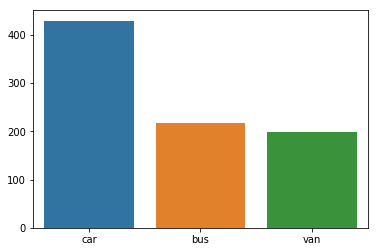

In [12]:
sns.barplot(df['class'].value_counts().index,df['class'].value_counts().values)
plt.show()

### Outlier detection

For this example, using boxplot shape only the outlier persence is detected for each independent var. though shape too can be infered
it is not interpreted

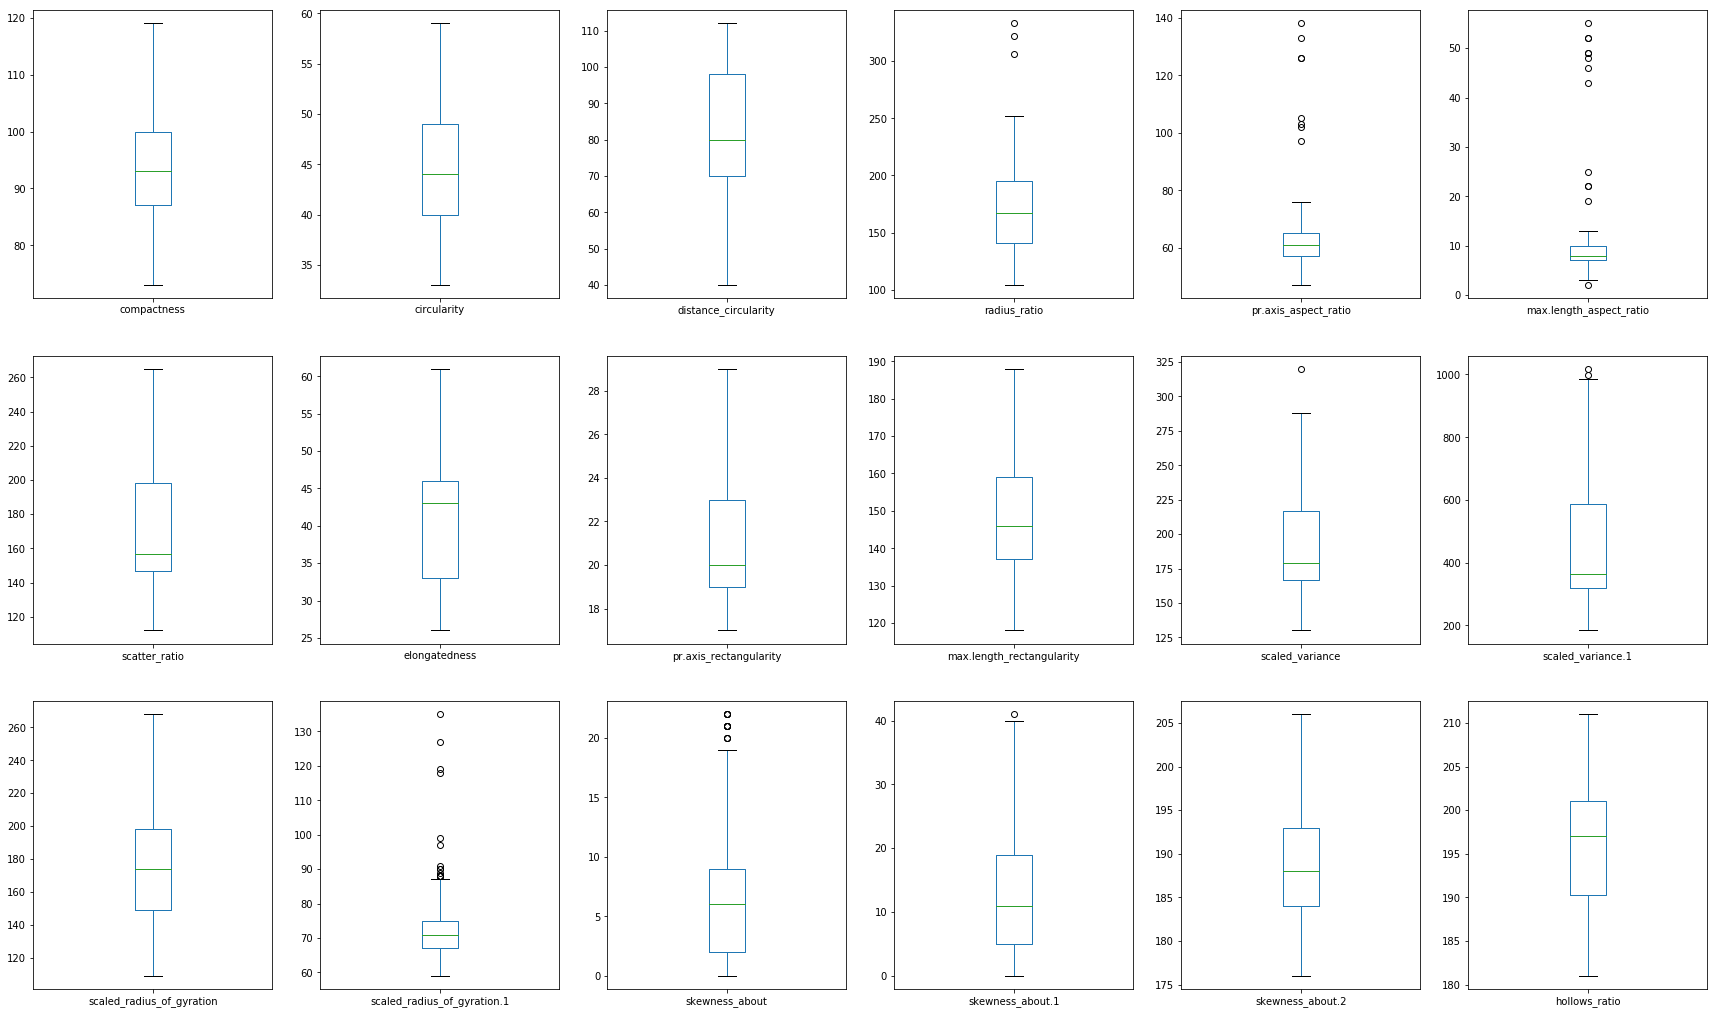

In [13]:
i=0
j=0

fig, ax = plt.subplots(3,6)

non_obj_cols = df.select_dtypes(exclude=np.object).columns
for col in non_obj_cols:
    df[col].plot.box(figsize=(30,18),ax=ax[i,j])
      
    j+=1   
    if(j%6 == 0):
        j=0
        i+=1

plt.show()

In [14]:
IQR = iqr(df.drop(columns='class'),axis=0)
q1,q3 = np.percentile(df.drop(columns='class'),[25,75],axis=0)
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)
lower_bound_count = (df.drop(columns='class') < lower_bound).sum()
upper_bound_count = (df.drop(columns='class') > upper_bound).sum()

d = { 'Q1':q1,'Q3':q3,'IQR':IQR,'lower_bound_values':lower_bound,'upper_bound_values':upper_bound,\
         'lower_bound_counts':lower_bound_count, 'upper_bound_counts': upper_bound_count}

outlier_df = pd.DataFrame(data= d, index=non_obj_cols)
outlier_df

Q1      Q3     IQR  lower_bound_values  \
compactness                   87.00  100.00   13.00              67.500   
circularity                   40.00   49.00    9.00              26.500   
distance_circularity          70.00   98.00   28.00              28.000   
radius_ratio                 141.00  195.00   54.00              60.000   
pr.axis_aspect_ratio          57.00   65.00    8.00              45.000   
max.length_aspect_ratio        7.00   10.00    3.00               2.500   
scatter_ratio                147.00  198.00   51.00              70.500   
elongatedness                 33.00   46.00   13.00              13.500   
pr.axis_rectangularity        19.00   23.00    4.00              13.000   
max.length_rectangularity    137.00  159.00   22.00             104.000   
scaled_variance              167.00  217.00   50.00              92.000   
scaled_variance.1            318.25  586.75  268.50             -84.500   
scaled_radius_of_gyration    149.00  198.00   49.00              75.500   
scaled_radius_of_gyration.1   67.00   75.00    8.00              55.000   
skewness_about                 2.00    9.00    7.00              -8.500   
skewness_about.1               5.00   19.00   14.00             -16.000   
skewness_about.2             184.00  193.00    9.00             170.500   
hollows_ratio                190.25  201.00   10.75             174.125   

                             upper_bound_values  lower_bound_counts  \
compactness                             119.500                   0   
circularity                              62.500                   0   
distance_circularity                    140.000                   0   
radius_ratio                            276.000                   0   
pr.axis_aspect_ratio                     77.000                   0   
max.length_aspect_ratio                  14.500                   1   
scatter_ratio                           274.500                   0   
elongatedness                            65.500                   0   
pr.axis_rectangularity                   29.000                   0   
max.length_rectangularity               192.000                   0   
scaled_variance                         292.000                   0   
scaled_variance.1                       989.500                   0   
scaled_radius_of_gyration               271.500                   0   
scaled_radius_of_gyration.1              87.000                   0   
skewness_about                           19.500                   0   
skewness_about.1                         40.000                   0   
skewness_about.2                        206.500                   0   
hollows_ratio                           217.125                   0   

                             upper_bound_counts  
compactness                                   0  
circularity                                   0  
distance_circularity                          0  
radius_ratio                                  3  
pr.axis_aspect_ratio                          8  
max.length_aspect_ratio                      12  
scatter_ratio                                 0  
elongatedness                                 0  
pr.axis_rectangularity                        0  
max.length_rectangularity                     0  
scaled_variance                               1  
scaled_variance.1                             2  
scaled_radius_of_gyration                     0  
scaled_radius_of_gyration.1                  15  
skewness_about                               12  
skewness_about.1                              1  
skewness_about.2                              0  
hollows_ratio                                 0

### Inferences:
    From the above it can infered that outlier are present for the following features
        * skewness_about.1
        * skewness_about
        * scaled_radius_of_gyration.1
        * scaled_variance.1        
        * scaled_variance
        * max_length_ascpect_ratio
        * pr_axis_aspect_ratio
        * radius_ratio

And also as the outliers counts w.r.t each features are lesser( < 2%) at present not handling it.

In [15]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.830922    6.134092   33.0   40.00   
distance_circularity         846.0   82.081028   15.747046   40.0   70.00   
radius_ratio                 846.0  168.896416   33.416963  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.680151    7.882380   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.916139   33.197817  112.0  147.00   
elongatedness                846.0   40.930371    7.812170   26.0   33.00   
pr.axis_rectangularity       846.0   20.581168    2.589444   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.623823   31.369911  130.0  167.00   
scaled_variance.1            846.0  439.638400  176.482640  184.0  318.25   
scaled_radius_of_gyration    846.0  174.724663   32.547674  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.444292    7.471674   59.0   67.00   
skewness_about               846.0    6.358665    4.904475    0.0    2.00   
skewness_about.1             846.0   12.605403    8.931229    0.0    5.00   
skewness_about.2             846.0  188.920182    6.152195  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration.1   71.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

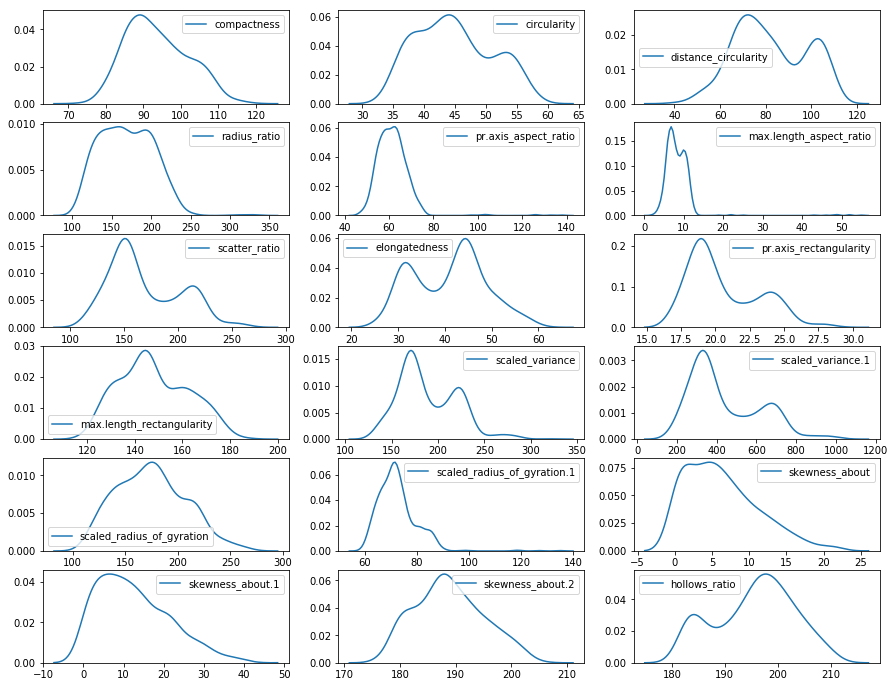

In [16]:
i=0
j=0

fig, ax = plt.subplots(6,3, figsize=(15,12))

non_obj_cols = df.select_dtypes(exclude=np.object).columns
for col in non_obj_cols:
    sns.kdeplot(df[col],ax=ax[i,j])  
    j+=1   
    if(j%3 == 0):
        j=0
        i+=1

plt.show()

### Inferences:
    From the .describe(), if can infered that almost the shape are normal distributed expect for few such as 
    * scatter_ratio 
    * elongatedness
    * scaled_variance
    * scaled_variance.1
    
The lenghty tails represents the outliers (Refer the outlier_df).
Also, visibly min 2 modes can be infered.

Right skewed data are, 

    distance_circularity, radius_ratio, scatter_ratio,max.length_rectangularity,
    scaled_variance, scaled_radius_of_gyration.1,skewness_about.1 

### Bi-variate analysis

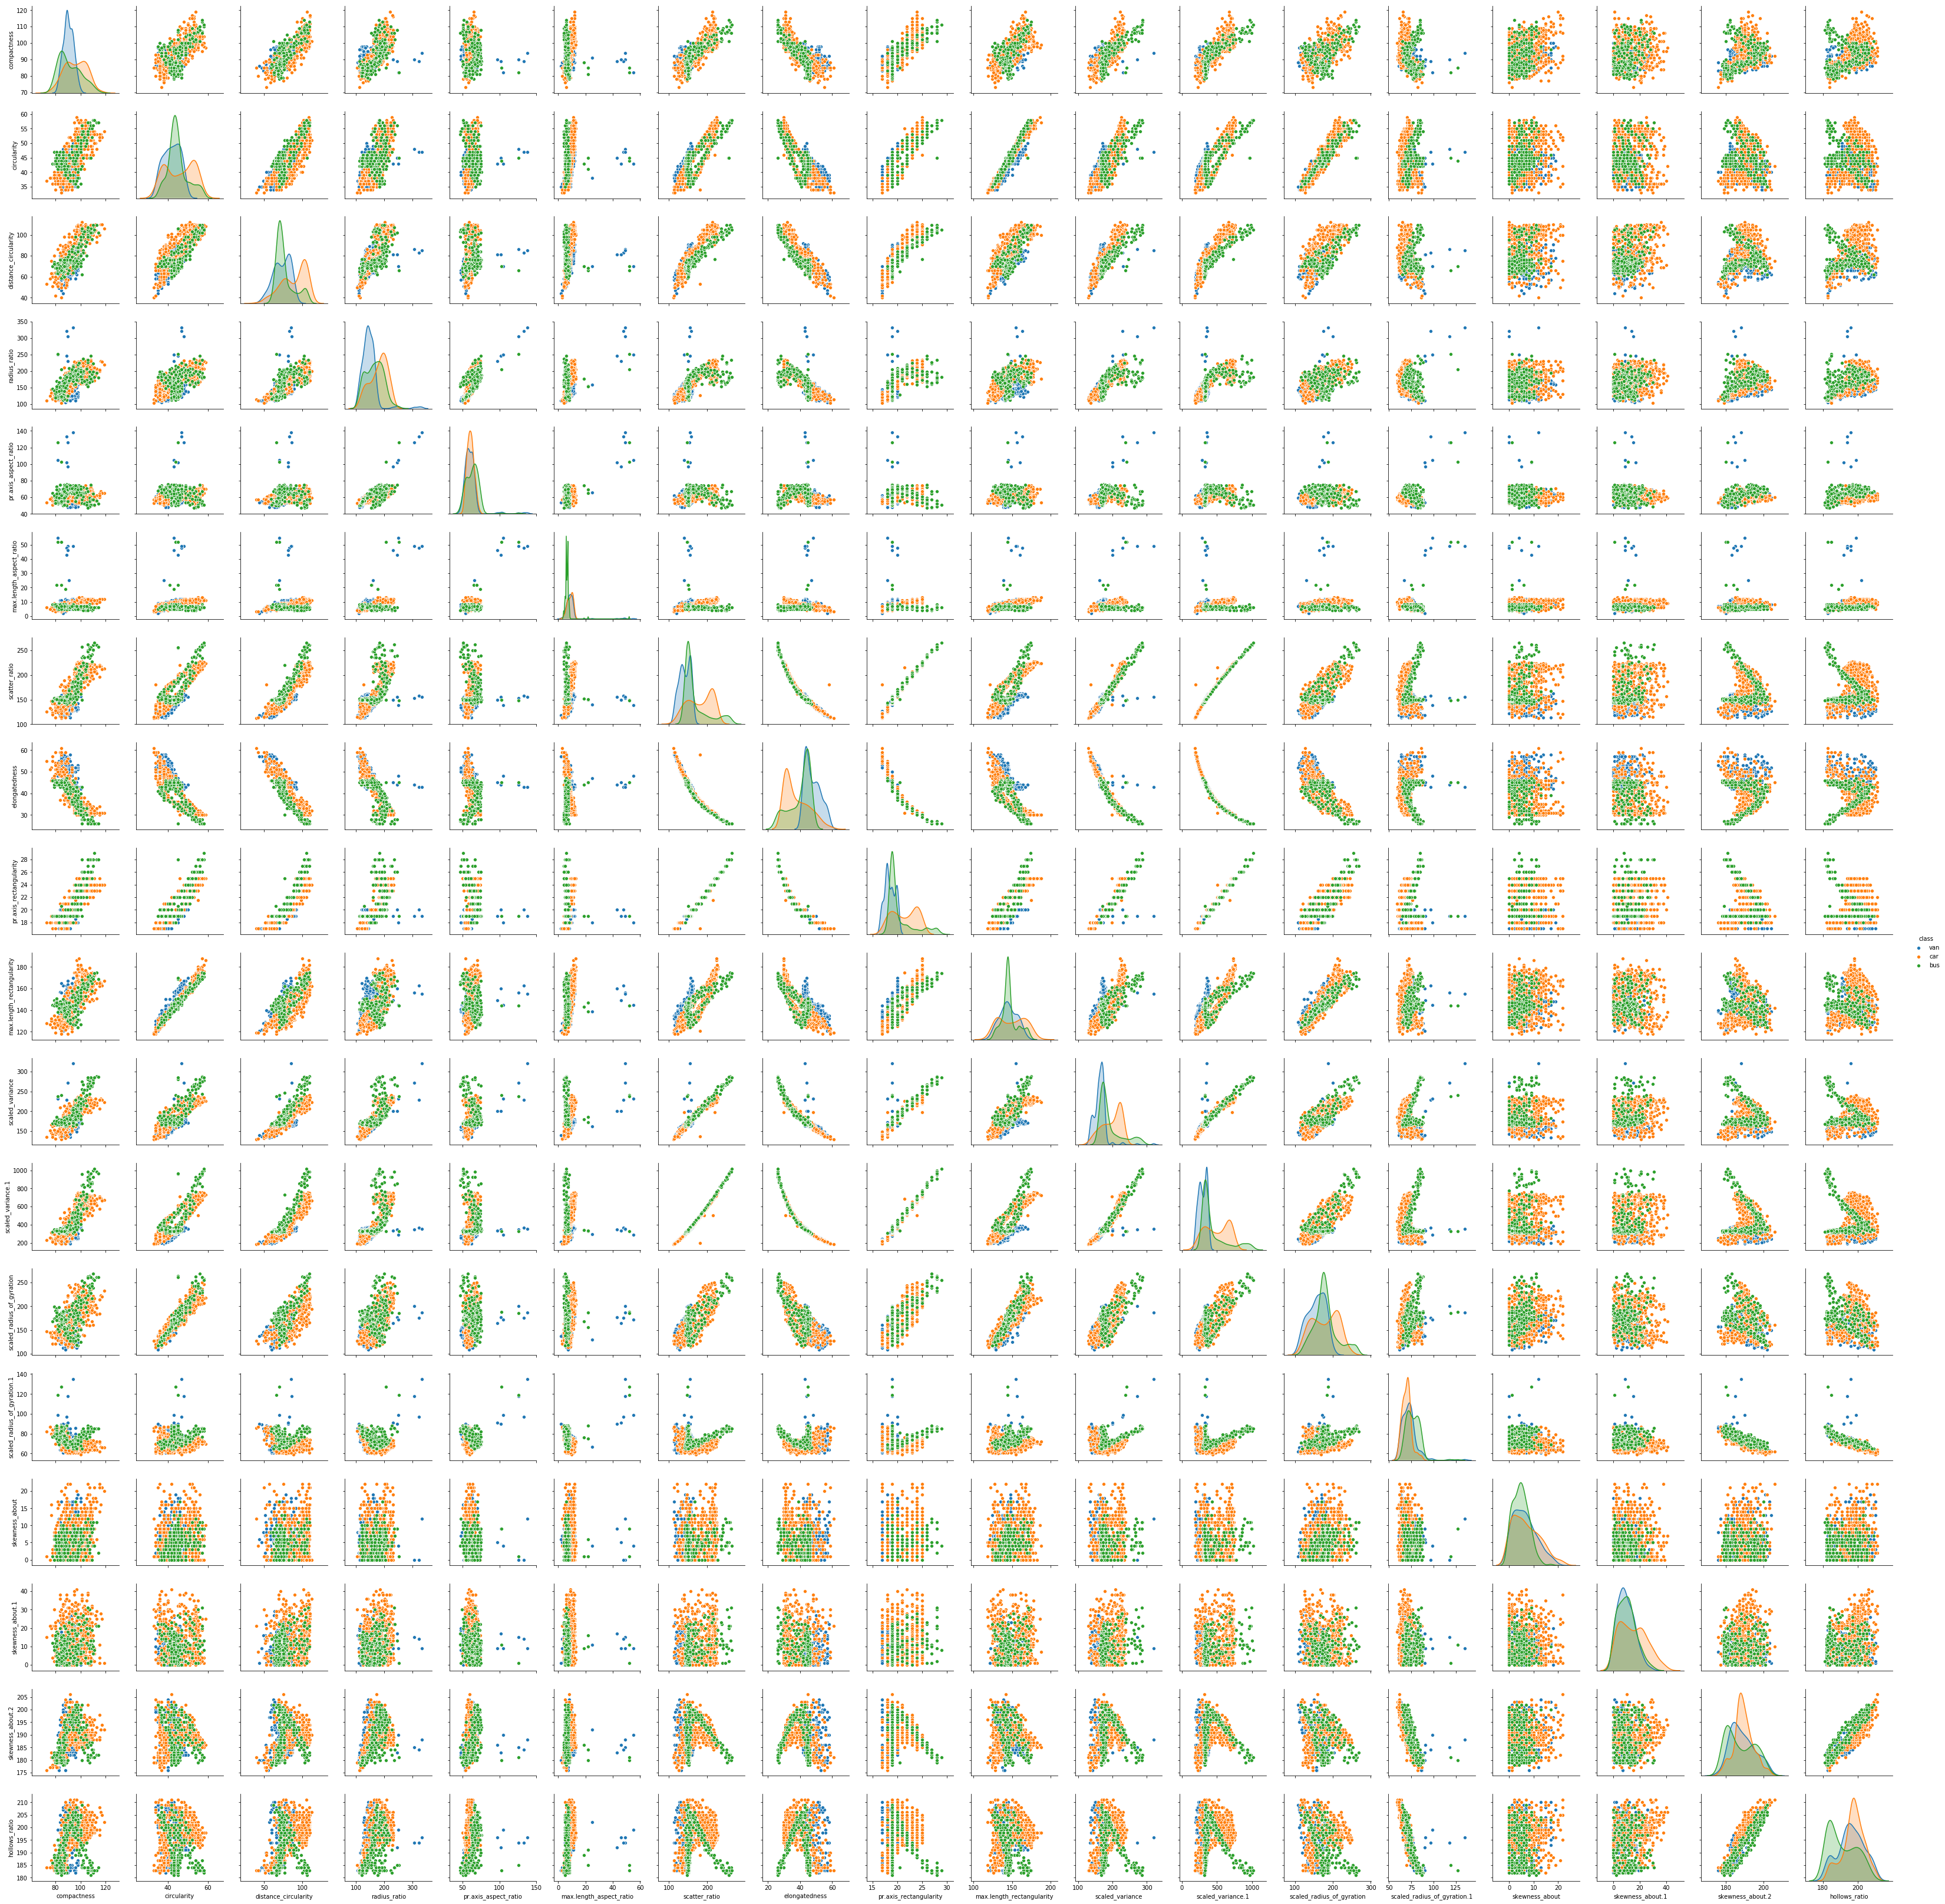

In [17]:
sns.pairplot(df,diag_kind='kde',hue='class')
plt.show()

### Features with better correlation ( threshold: > & < 0.5)

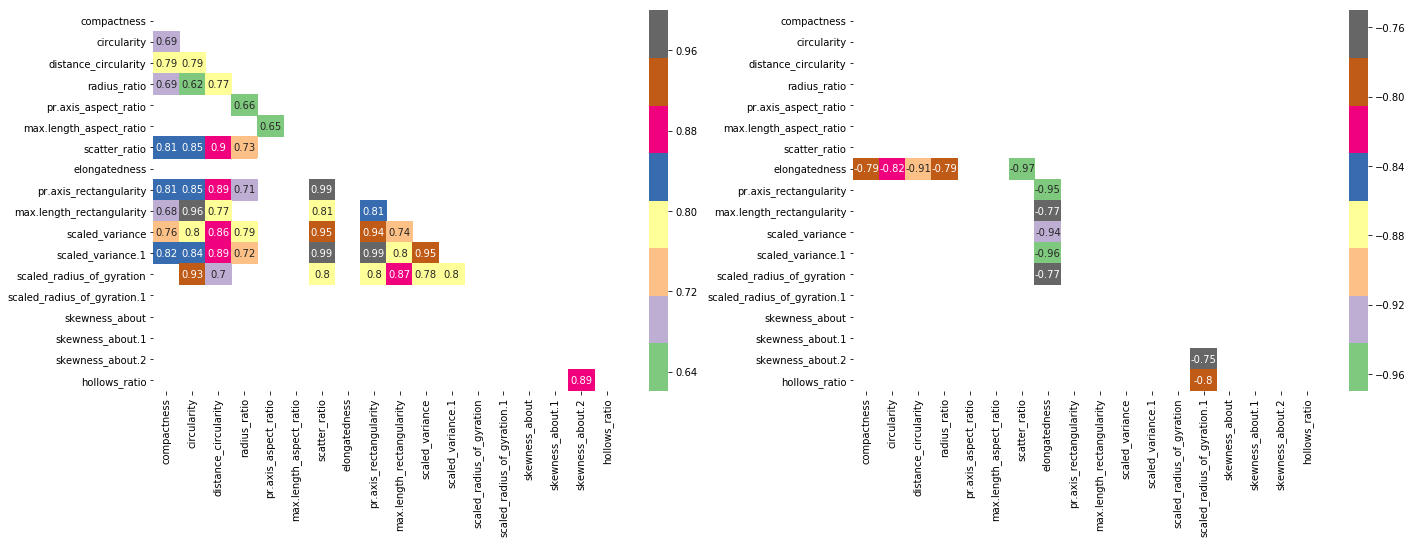

In [18]:
fig, ax = plt.subplots(1,2, figsize=(23,7))

corr = df.corr()

corr_thld = 0.6

# positive correlation
corr_thld_p5 = corr[(corr > corr_thld)]
mask = np.zeros_like(corr_thld_p5)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_thld_p5, mask=mask, annot=True, cmap='Accent', ax=ax[0])

# negative correlation
corr_thld_p5 = corr[(corr < -(corr_thld))]
mask = np.zeros_like(corr_thld_p5)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_thld_p5, mask=mask, annot=True, cmap='Accent', ax=ax[1])

plt.show()

Refer the above for feature correlations (+ve as well -ve).

There are features that are highly correlated, which can be infered from the above.

Features max_lenght_aspect_ratio, scaled_radius_of_gyration, skewdness_about, skewness_about.1 has very weak correlation with other features (i.e. either < | > 0.5)

### Split the data

In [19]:
#Derive the predictors and target variables
X = df.drop(columns=['class'])
y = df['class']

In [20]:
# Split the data-set into train and test (of 80:20 ratio)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=3)
print('Train data-set size: X_train{} y_train{}'.format(x_train.shape,y_train.shape))
print('Test data-set size: X_train{} y_train{}'.format(x_test.shape,y_test.shape))

Train data-set size: X_train(592, 18) y_train(592,)
Test data-set size: X_train(254, 18) y_train(254,)


### Prinicipal component analysis

Understand the components individual & cummulative variance

In [21]:
sc = StandardScaler()
x_std =  sc.fit_transform(X) 

In [22]:
model_pca = PCA(n_components=X.shape[1])

#X_reduced = model_pca.fit_transform(X)
X_reduced = model_pca.fit_transform(x_std)

X_reduced.shape

(846, 18)

In [23]:
pd.DataFrame(X_reduced).describe().T

count          mean       std       min       25%       50%       75%  \
0   846.0 -4.199425e-18  3.067259 -6.371972 -2.262220 -0.836407  2.909965   
1   846.0 -2.946159e-17  1.737501 -4.031916 -1.236921 -0.018943  1.162598   
2   846.0 -1.351690e-17  1.379456 -2.559678 -0.506037 -0.115240  0.298471   
3   846.0  3.359540e-17  1.086150 -3.058731 -0.665220  0.012256  0.733627   
4   846.0 -5.956294e-17  0.958229 -2.102244 -0.683214 -0.060866  0.611149   
5   846.0  3.490772e-17  0.734321 -1.984058 -0.461551 -0.052012  0.447852   
6   846.0 -1.290175e-17  0.598641 -1.592052 -0.403346 -0.013234  0.366167   
7   846.0  1.594469e-17  0.471452 -1.443290 -0.298156  0.007967  0.314651   
8   846.0  1.377936e-18  0.399577 -1.231806 -0.285762  0.003428  0.251758   
9   846.0 -1.043295e-17  0.302647 -0.901381 -0.171198  0.003369  0.201450   
10  846.0 -1.082664e-18  0.257849 -1.144995 -0.157956  0.009672  0.161634   
11  846.0 -4.281445e-18  0.213279 -0.783237 -0.129425  0.005029  0.136830   
12  846.0  8.989394e-18  0.187698 -0.433273 -0.130790 -0.024364  0.099320   
13  846.0 -2.091511e-17  0.161500 -0.880637 -0.093340  0.004299  0.099628   
14  846.0  1.863495e-17  0.143592 -0.529787 -0.092431 -0.010073  0.079857   
15  846.0  3.051145e-18  0.129115 -0.609250 -0.077767 -0.003605  0.081010   
16  846.0  6.331946e-18  0.091580 -0.421524 -0.062518 -0.002026  0.054953   
17  846.0 -4.259300e-17  0.058370 -0.143775 -0.019883 -0.001573  0.016066   

          max  
0    7.429076  
1    4.752024  
2   15.440444  
3    3.266826  
4    3.871290  
5    2.484350  
6    2.669288  
7    1.527196  
8    2.086321  
9    0.987873  
10   1.847331  
11   0.800620  
12   0.680759  
13   1.144951  
14   1.118387  
15   0.874726  
16   1.016205  
17   1.333656

In [24]:
# principal components a.k.a eigen vectors
pd.DataFrame(model_pca.components_)

0         1         2         3         4         5         6   \
0   0.275248  0.293449  0.304471  0.267645  0.080453  0.097194  0.316695   
1  -0.127043  0.126307 -0.073397 -0.190057 -0.122316  0.010625  0.048052   
2  -0.119986 -0.024977 -0.055810  0.274622  0.642137  0.591960 -0.097789   
3   0.078570  0.188550 -0.071726 -0.042228  0.032695  0.030844 -0.095939   
4   0.069725 -0.085096  0.039534 -0.045216 -0.041083  0.212879 -0.014657   
5   0.142627 -0.299368 -0.140242  0.249158  0.239707 -0.422138  0.116775   
6   0.453342 -0.248781  0.072555 -0.176348 -0.395652  0.501244  0.065828   
7  -0.566112 -0.177650  0.435083  0.103222 -0.070332  0.161232  0.100876   
8  -0.482408 -0.016206 -0.166969 -0.228187 -0.278823  0.147753  0.052837   
9  -0.262978  0.098960 -0.208947 -0.044530  0.103793 -0.117094  0.168710   
10  0.047789 -0.001597  0.707408 -0.111728  0.042034 -0.263508 -0.186232   
11  0.014088 -0.188077 -0.018140 -0.156745  0.107931 -0.133544  0.108526   
12 -0.160783 -0.014965  0.224975  0.059537  0.021566 -0.043871 -0.016915   
13 -0.052661  0.388604 -0.156013  0.556683 -0.384710 -0.059991 -0.087258   
14  0.009083 -0.559302 -0.164444  0.039157  0.010156 -0.089839 -0.104776   
15 -0.057012 -0.391770  0.054363  0.549532 -0.306054  0.032835  0.005378   
16 -0.001020 -0.090364  0.024755  0.012898  0.001096  0.018948  0.511597   
17 -0.002762  0.017563  0.001203 -0.030632  0.018758 -0.021647  0.701366   

          7         8         9         10        11        12        13  \
0  -0.313995  0.314070  0.282764  0.309256  0.314439  0.271844 -0.020861   
1   0.012773  0.060967  0.116232  0.061703  0.052925  0.209635  0.488423   
2   0.057391 -0.109568 -0.016622  0.056300 -0.108693 -0.031211  0.286310   
3   0.083328 -0.092332  0.188505 -0.120527 -0.090565  0.200823 -0.066541   
4   0.077382  0.001233 -0.060799  0.000411 -0.019530 -0.061689  0.146078   
5  -0.142795  0.096593 -0.461186  0.237269  0.155007 -0.133906  0.238734   
6   0.013052  0.097026 -0.108193  0.117141  0.084217 -0.375245  0.111604   
7  -0.216825  0.064227 -0.249971  0.050686  0.039011 -0.108537 -0.340027   
8  -0.156034  0.009213 -0.062791  0.298922  0.078087  0.244969  0.321217   
9  -0.150902  0.193705  0.470440 -0.121849  0.149821 -0.687223  0.126130   
10 -0.058573 -0.264273  0.142828  0.073709 -0.229099 -0.157776  0.421672   
11  0.112148  0.246438 -0.140169 -0.195955  0.157298  0.174680  0.281551   
12  0.827066  0.270174  0.073470  0.166528  0.287214 -0.039201 -0.032510   
13  0.142465 -0.210465 -0.138807  0.274189 -0.093223 -0.188565  0.145862   
14  0.019317 -0.146863  0.479444  0.534032 -0.117807  0.094724 -0.158103   
15 -0.033335  0.144900  0.238642 -0.499429 -0.072431  0.178428  0.210903   
16  0.114310 -0.716110  0.052906 -0.140443  0.423581  0.030432  0.014419   
17  0.188237  0.115739 -0.023665  0.070578 -0.670662  0.001952  0.003978   

          14        15        16        17  
0   0.041453  0.058607  0.030066  0.074047  
1  -0.055832 -0.123830 -0.540785 -0.540013  
2  -0.115320 -0.075463  0.008642  0.039422  
3   0.602843 -0.667005  0.105232  0.047381  
4   0.730968  0.597103 -0.100484 -0.030254  
5   0.203000 -0.191888  0.155826 -0.242941  
6  -0.079368 -0.286232  0.018547  0.012852  
7   0.156804 -0.209044 -0.304163 -0.031174  
8   0.022038  0.008892  0.517026  0.172656  
9   0.098819 -0.035693  0.021634  0.062203  
10 -0.011540 -0.034171  0.118890  0.095877  
11  0.001353 -0.084831 -0.370151  0.698698  
12 -0.009116 -0.030766  0.166358 -0.114625  
13  0.015350 -0.027475 -0.230081  0.272532  
14  0.027370 -0.009405 -0.208631  0.100797  
15 -0.023826 -0.000576  0.153461 -0.096861  
16 -0.001916  0.000487  0.000353  0.000147  
17 -0.003482 -0.012330  0.040513 -0.005156

In [25]:
# components variance a.k.a eigen values
pd.DataFrame(model_pca.explained_variance_, columns=['Eigen Values']).T

0         1         2         3         4         5   \
Eigen Values  9.408077  3.018908  1.902899  1.179721  0.918204  0.539228   

                    6         7         8         9         10        11  \
Eigen Values  0.358371  0.222267  0.159662  0.091595  0.066486  0.045488   

                   12        13        14        15        16        17  
Eigen Values  0.03523  0.026082  0.020619  0.016671  0.008387  0.003407

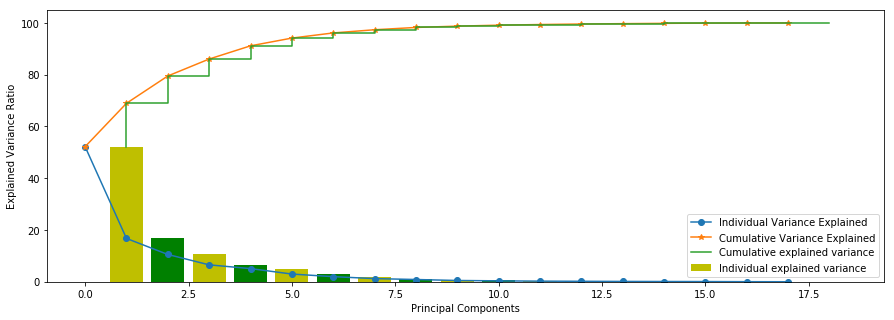

In [26]:
tot = sum(model_pca.explained_variance_)
var_exp = [( i /tot ) * 100 for i in model_pca.explained_variance_]
cum_var_exp = np.cumsum(var_exp)


plt.figure(figsize=(15,5))
plt.plot(var_exp, marker='o', label='Individual Variance Explained')
plt.plot(cum_var_exp, marker='*', label='Cumulative Variance Explained')
plt.xlabel('PCA')

plt.bar(range(1,model_pca.explained_variance_.size + 1),var_exp,alpha = 1,color='YG', align='center',label = 'Individual explained variance')
plt.step(range(1,model_pca.explained_variance_.size + 1), cum_var_exp, label = 'Cumulative explained variance')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend()
plt.show()

In [27]:
print("Individual Variance Explained", var_exp)
print("\nCumulative Variance Explained", cum_var_exp)

Individual Variance Explained [52.20531350127836, 16.751887540981926, 10.559165560034414, 6.5462580397158385, 5.095102315379759, 2.9921697368129645, 1.9885958064298386, 1.2333573165481015, 0.8859608392491669, 0.5082592153974493, 0.3689317134192729, 0.2524115560737174, 0.19549334014221995, 0.1447304851676258, 0.11441282123348699, 0.09250575299428519, 0.04653896731130168, 0.018905491830268725]

Cumulative Variance Explained [ 52.2053135   68.95720104  79.5163666   86.06262464  91.15772696
  94.14989669  96.1384925   97.37184982  98.25781066  98.76606987
  99.13500159  99.38741314  99.58290648  99.72763697  99.84204979
  99.93455554  99.98109451 100.        ]


### Inferences:
   From the above it can be infered that ~6 - 7 components captures more than 95% of information from the original data-set's features.

### Build classification model - SVC on Original data-set

Without dimension reduction, apply GridsearchCV and understand the behavior

In [28]:
def SVC_GridSearchValidation(estimator):
    
    param_grid = { 'svc__C':[0.01,0.05,0.5,1.0], 'svc__kernel':('linear','rbf') }
    
    svcgscv = GridSearchCV(estimator, param_grid=param_grid, cv=8 )
    
    svcgscv.fit(x_train,y_train)
        
    print('\nGridSearch Parameter setting that gave the best results on the hold out data\n\t', svcgscv.best_params_)
    print('\nMean cross-validated score of the best_estimator\n\t',svcgscv.best_score_)
    
    print('\nTest score\n\t',svcgscv.score(x_test,y_test))

In [29]:
# Building classification on orignal data-sets
def SVC_wo_PCA():
    
    # consturct a pipeline
    pipe = make_pipeline(StandardScaler(), SVC())
    pipe.fit(x_train,y_train)
    
    print('\nTest score with default parameter setting for SVC\n\t',pipe.score(x_test,y_test))
    
    y_predict = pipe.predict(x_test)
    print('\nclassification_report:\n',classification_report(y_test, y_predict))
    print('\nconfusion_matrix:\n',confusion_matrix(y_test, y_predict))
    
    # Apply Gridsearch
    SVC_GridSearchValidation(pipe)

In [30]:
SVC_wo_PCA()


Test score with default parameter setting for SVC
	 0.9488188976377953

classification_report:
               precision    recall  f1-score   support

         bus       0.96      0.96      0.96        71
         car       0.97      0.95      0.96       123
         van       0.89      0.93      0.91        60

   micro avg       0.95      0.95      0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254


confusion_matrix:
 [[ 68   0   3]
 [  2 117   4]
 [  1   3  56]]

GridSearch Parameter setting that gave the best results on the hold out data
	 {'svc__C': 1.0, 'svc__kernel': 'rbf'}

Mean cross-validated score of the best_estimator
	 0.956081081081081

Test score
	 0.9488188976377953


### Inferences:
    Without PCA (i.e. without dimension reduction) 
    
    * The test score is same(94.8%) as without GridsearchCV
    
    * when the SVC classifcation model is applied for the orignal data-sets,from the above it could be infered
      for the given grid_params, the best estimator is C:1 & kernel:rbf which is the default settings for SVC.
      

### Build classification model - SVC on principal components

In [31]:
# Building classification on principal components
def SVC_w_PCA(components_number):
    
    # consturct a pipeline
    pipe1 = make_pipeline(StandardScaler(),PCA(n_components= components_number), SVC())
    pipe1.fit(x_train,y_train)
    
    print('\nTest score with default parameter setting for SVC\n\t',pipe1.score(x_test,y_test))
    
    y_predict = pipe1.predict(x_test)
    print('\nclassification_report:\n',classification_report(y_test, y_predict))
    print('\nconfusion_matrix:\n',confusion_matrix(y_test, y_predict))
    
    # Apply Gridsearch
    SVC_GridSearchValidation(pipe1)

In [32]:
SVC_w_PCA(11)


Test score with default parameter setting for SVC
	 0.9448818897637795

classification_report:
               precision    recall  f1-score   support

         bus       0.96      0.96      0.96        71
         car       0.97      0.95      0.96       123
         van       0.89      0.92      0.90        60

   micro avg       0.94      0.94      0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.95      0.94      0.95       254


confusion_matrix:
 [[ 68   0   3]
 [  2 117   4]
 [  1   4  55]]

GridSearch Parameter setting that gave the best results on the hold out data
	 {'svc__C': 1.0, 'svc__kernel': 'rbf'}

Mean cross-validated score of the best_estimator
	 0.956081081081081

Test score
	 0.9448818897637795


### Inferences:
   
    * The best estimator is C:1 & kernel:rbf which is the default settings for SVC.
        
    It could be noted that, GridsearchCV with SVC estimator
                           Mean cross-validated score         Test score
       Without PCA               95.60%                         94.88% 
        With PCA                 95.60%                         94.48%

    With reduced dimensions(11) test accuracy is almost same while compared to model score without dimensional 
    reduction.
        
Note:
  when the number components in PCA is less than 11 the accuarcy score is ~93%, when the number components was 11 and greater it is 94.48%. And also 11 principal components encapsulates almost 99.13% of information form the original data-sets 

### Handling outliers:

#### Impute it with median

In [33]:
for feat, bound_counts  in outlier_df['lower_bound_counts'].items():
    if(bound_counts):
        print(feat, bound_counts, outlier_df.loc[feat,'lower_bound_values'], df[feat].median())
        df[feat].mask( cond= (df[feat] <   outlier_df.loc[feat,'lower_bound_values']), other = df[feat].median(), inplace=True)
    
for feat, bound_counts  in outlier_df['upper_bound_counts'].items():
    if(bound_counts):
        print(feat, bound_counts, outlier_df.loc[feat,'upper_bound_values'], df[feat].median())
        df[feat].mask( cond= (df[feat] > outlier_df.loc[feat,'upper_bound_values']), other = df[feat].median(), inplace=True)

max.length_aspect_ratio 1 2.5 8.0
radius_ratio 3 276.0 167.0
pr.axis_aspect_ratio 8 77.0 61.0
max.length_aspect_ratio 12 14.5 8.0
scaled_variance 1 292.0 179.0
scaled_variance.1 2 989.5 364.0
scaled_radius_of_gyration.1 15 87.0 71.0
skewness_about 12 19.5 6.0
skewness_about.1 1 40.0 11.0


In [34]:
#Derive the predictors and target variables
X = df.drop(columns=['class'])
y = df['class']

# Split the data-set into train and test (of 80:20 ratio)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=3)
print('Data-set shape{}'.format(df.shape))
print('Train data-set size: X_train{} y_train{}'.format(x_train.shape,y_train.shape))
print('Test data-set size: X_train{} y_train{}'.format(x_test.shape,y_test.shape))

Data-set shape(846, 19)
Train data-set size: X_train(592, 18) y_train(592,)
Test data-set size: X_train(254, 18) y_train(254,)


In [35]:
def p_c_a():
    sc = StandardScaler()
    x_std =  sc.fit_transform(X) 

    model_pca = PCA(n_components=X.shape[1])

    X_reduced = model_pca.fit_transform(x_std)

    print('PCA shape{}'.format(X_reduced.shape))

    tot = sum(model_pca.explained_variance_)
    var_exp = [( i /tot ) * 100 for i in model_pca.explained_variance_]
    cum_var_exp = np.cumsum(var_exp)

    print("Individual Variance Explained", var_exp)
    print("\nCumulative Variance Explained", cum_var_exp)

In [36]:
p_c_a()

PCA shape(846, 18)
Individual Variance Explained [54.117203947747115, 18.60512870425814, 6.615581711928723, 6.293521060975786, 4.908049045272521, 3.693200969294076, 1.7599115893505264, 1.2701399418001917, 0.7299982355707079, 0.44355021093710467, 0.4002495075643878, 0.3558419246008179, 0.21735506188001996, 0.17332716847470375, 0.16220271454219143, 0.11669275572389927, 0.10061902536352349, 0.03742642471558744]

Cumulative Variance Explained [ 54.11720395  72.72233265  79.33791436  85.63143542  90.53948447
  94.23268544  95.99259703  97.26273697  97.99273521  98.43628542
  98.83653492  99.19237685  99.40973191  99.58305908  99.74526179
  99.86195455  99.96257358 100.        ]


In [37]:
SVC_wo_PCA()


Test score with default parameter setting for SVC
	 0.9606299212598425

classification_report:
               precision    recall  f1-score   support

         bus       0.96      0.99      0.97        71
         car       0.97      0.95      0.96       123
         van       0.95      0.95      0.95        60

   micro avg       0.96      0.96      0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254


confusion_matrix:
 [[ 70   1   0]
 [  3 117   3]
 [  0   3  57]]

GridSearch Parameter setting that gave the best results on the hold out data
	 {'svc__C': 1.0, 'svc__kernel': 'rbf'}

Mean cross-validated score of the best_estimator
	 0.956081081081081

Test score
	 0.9606299212598425


In [38]:
SVC_w_PCA(12)


Test score with default parameter setting for SVC
	 0.9645669291338582

classification_report:
               precision    recall  f1-score   support

         bus       0.97      1.00      0.99        71
         car       0.97      0.96      0.96       123
         van       0.95      0.93      0.94        60

   micro avg       0.96      0.96      0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254


confusion_matrix:
 [[ 71   0   0]
 [  2 118   3]
 [  0   4  56]]

GridSearch Parameter setting that gave the best results on the hold out data
	 {'svc__C': 1.0, 'svc__kernel': 'rbf'}

Mean cross-validated score of the best_estimator
	 0.9527027027027027

Test score
	 0.9645669291338582


### Inferences:
   
    After imputing the outliers with (series) median value
    * The best estimator is C:1 & kernel:rbf which is the default settings for SVC.
        
    It could be noted that, GridsearchCV with SVC estimator
                           Mean cross-validated score         Test score
       Without PCA               95.60%                         96.06% 
        With PCA                 95.27%                         96.45%

    With reduced dimensions(12) test accuracy is almost same or slightly better while compared to model score without
    dimensional reduction.
        
Note:
  Highest accuarcy score ~96.45% is observed when the number components in PCA is 12.

### Handling collinearity - by removing the features

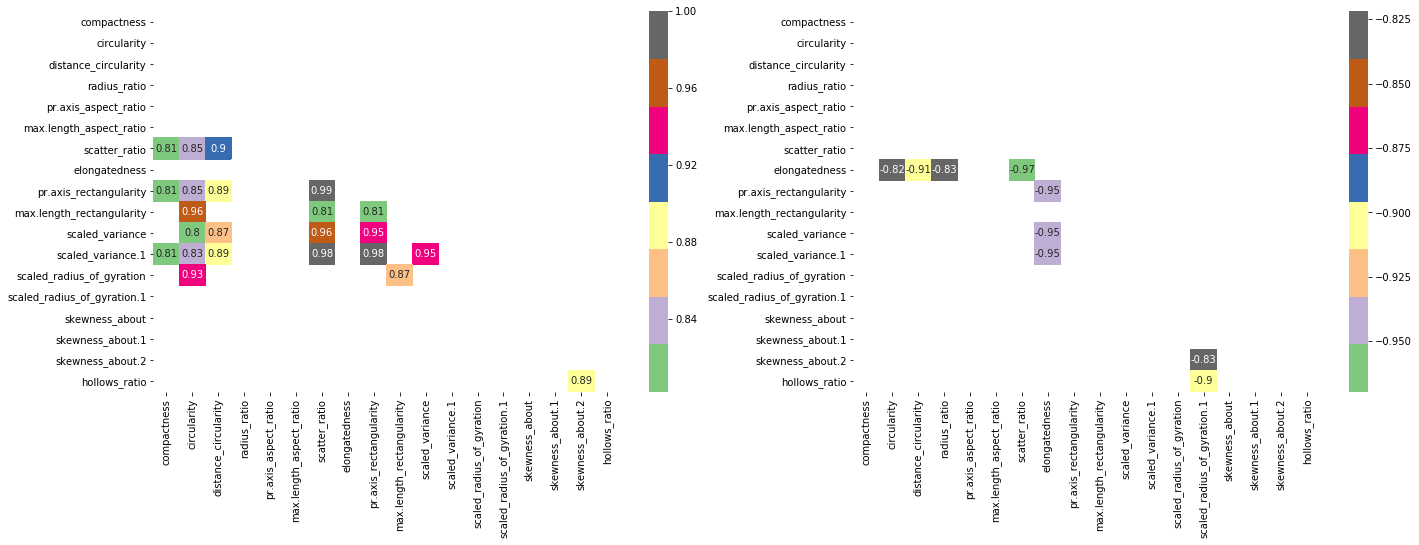

In [39]:
fig, ax = plt.subplots(1,2, figsize=(23,7))

corr = df.corr()

corr_thld = 0.8

# positive correlation
corr_thld_p5 = corr[(corr > corr_thld)]
mask = np.zeros_like(corr_thld_p5)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_thld_p5, mask=mask, annot=True, cmap='Accent', ax=ax[0])

# negative correlation
corr_thld_p5 = corr[(corr < -(corr_thld))]
mask = np.zeros_like(corr_thld_p5)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_thld_p5, mask=mask, annot=True, cmap='Accent', ax=ax[1])

plt.show()

In [40]:
# Drop the feature that has corr > | < 0.8 & -0.8
X = df.drop(columns=['class','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_radius_of_gyration.1', 'skewness_about.2'])
y = df['class']

# Split the data-set into train and test (of 80:20 ratio)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=3)
print('Data-set shape{}'.format(df.shape))
print('Train data-set size: X_train{} y_train{}'.format(x_train.shape,y_train.shape))
print('Test data-set size: X_train{} y_train{}'.format(x_test.shape,y_test.shape))

Data-set shape(846, 19)
Train data-set size: X_train(592, 12) y_train(592,)
Test data-set size: X_train(254, 12) y_train(254,)


In [41]:
p_c_a()

PCA shape(846, 12)
Individual Variance Explained [51.408476348565856, 14.666394995196406, 9.369294189813267, 8.589837634506384, 6.475075803915447, 4.173700930241698, 1.9965252562365317, 1.4628342487883352, 0.6720676687727217, 0.5413109122699088, 0.47010349319127837, 0.17437851850214764]

Cumulative Variance Explained [ 51.40847635  66.07487134  75.44416553  84.03400317  90.50907897
  94.6827799   96.67930516  98.14213941  98.81420708  99.35551799
  99.82562148 100.        ]


In [42]:
SVC_wo_PCA()


Test score with default parameter setting for SVC
	 0.9251968503937008

classification_report:
               precision    recall  f1-score   support

         bus       0.91      0.99      0.95        71
         car       0.94      0.92      0.93       123
         van       0.91      0.87      0.89        60

   micro avg       0.93      0.93      0.93       254
   macro avg       0.92      0.92      0.92       254
weighted avg       0.93      0.93      0.92       254


confusion_matrix:
 [[ 70   1   0]
 [  5 113   5]
 [  2   6  52]]

GridSearch Parameter setting that gave the best results on the hold out data
	 {'svc__C': 1.0, 'svc__kernel': 'rbf'}

Mean cross-validated score of the best_estimator
	 0.9341216216216216

Test score
	 0.9251968503937008


In [43]:
SVC_w_PCA(11)


Test score with default parameter setting for SVC
	 0.9291338582677166

classification_report:
               precision    recall  f1-score   support

         bus       0.92      0.99      0.95        71
         car       0.94      0.93      0.93       123
         van       0.91      0.87      0.89        60

   micro avg       0.93      0.93      0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254


confusion_matrix:
 [[ 70   1   0]
 [  4 114   5]
 [  2   6  52]]

GridSearch Parameter setting that gave the best results on the hold out data
	 {'svc__C': 1.0, 'svc__kernel': 'rbf'}

Mean cross-validated score of the best_estimator
	 0.9307432432432432

Test score
	 0.9291338582677166


### Project Conclusion

 For the given project, where the grid_params are { 'svc__C':[0.01,0.05,0.5,1.0], 'svc__kernel':('linear','rbf') }
    
    When the SVC classifcation model is applied, it could be infered for the given grid_params,    
    
        * The best estimator is C:1 & kernel:rbf which is the default settings for SVC.
        
    It could be noted that, GridsearchCV with SVC estimator
    
                           Mean cross-validated score         Test score        number_of_dimensions     Outliers_Imputed
       Without PCA               95.60%                         94.88%                   18                   No
        With PCA                 95.60%                         94.48%                   11                   No

    After imuting the outliers in the dataset, the scores are
    
                           Mean cross-validated score         Test score         number_of_dimensions     Outliers_Imputed
       Without PCA               95.60%                         96.06%                   18                   Yes
        With PCA                 95.27%                         96.45%                   12                   Yes
    
      After 'removing few features as to avoid collinearity', the scores are
    
                           Mean cross-validated score         Test score         number_of_dimensions     Outliers_Imputed
       Without PCA               93.41%                        92.51%                   12                   Yes
        With PCA                 93.07%                        92.91%                   11                   Yes
    
From the above synopsis, it can be infered that 
    * In-general by handling/imputing the the outliers, the performance of the model can be improved,
    * Also, almost similar or better model performance (observed without dimensional reduction) can be obtained with
      reduced dimensionality(PCA)
        
    * Removing the features as to avoid the collinearity reduces the model performance 
    
Hence, on the original data-set apply the transformation (i.e PCA) as to reduce the feature space but with all the information from the 
original data-set observed as much as possible and check for optimal components that yields better performance. 

### EOF